# Keşifsel Veri Analizi

## Cok Değişkenli Analiz

Bu ödevde Öğrencilerin Sınav Performansı'na ait verileri kullanacaksınız. 

Kaynak: https://www.kaggle.com/spscientist/students-performance-in-exams/home

### Q1

Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

---
***Ortalama ve Grafik Yorumlama***
- Cinsiyetin etkisi:
    - Erkekler matematikte,
    - Kizlar ise okuma ve yazma notlarinda daha iyi
- Kokenin etkisi:
    - E grubu matematikte butun gruplardan belirgin sekilde daha iyidir, 
    - E grubu okuma ve yazma branslarinda ise A ve B gruplarindan belirgin sekilde iyidir,
    - Ancak diger kokenler arasinda branslarda onemli derecede fark gorulmemektedir.
- Ebeveyn egitim durumu etkisi
    - Master ve Lisans derecesi ile mezun ailelerin cocuklari, lise mezunu ailelerin cocuklarina gore belirgi sekilde tum branslarda iyidir.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,math score,reading score,writing score
gender,,,
female,63.633,72.608,72.467
male,68.728,65.473,63.311


,math score,reading score,writing score
race/ethnicity,,,
group A,61.629,64.674,62.674
group B,63.453,67.353,65.600
group C,64.464,69.103,67.828
group D,67.363,70.031,70.145
group E,73.821,73.029,71.407


,math score,reading score,writing score
parental level of education,,,
associate's degree,67.883,70.928,69.896
bachelor's degree,69.390,73.000,73.381
high school,62.138,64.704,62.449
master's degree,69.746,75.373,75.678
some college,67.128,69.460,68.841
some high school,63.497,66.939,64.888


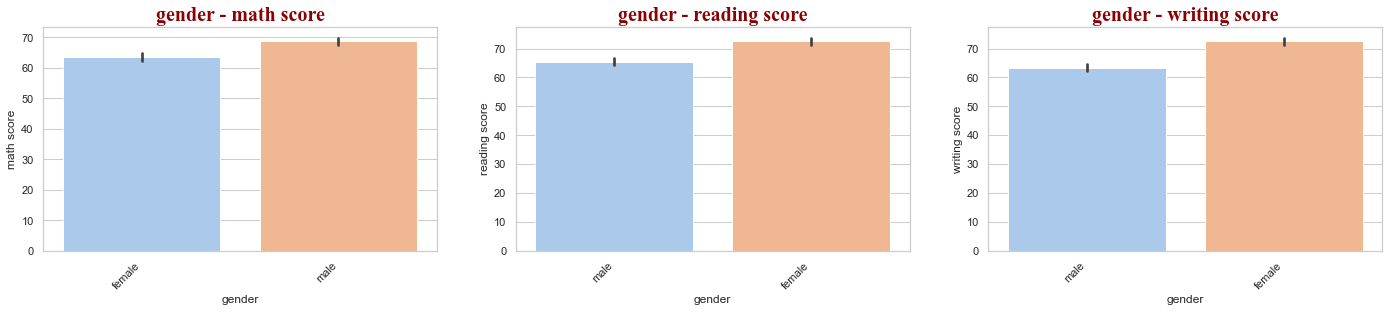

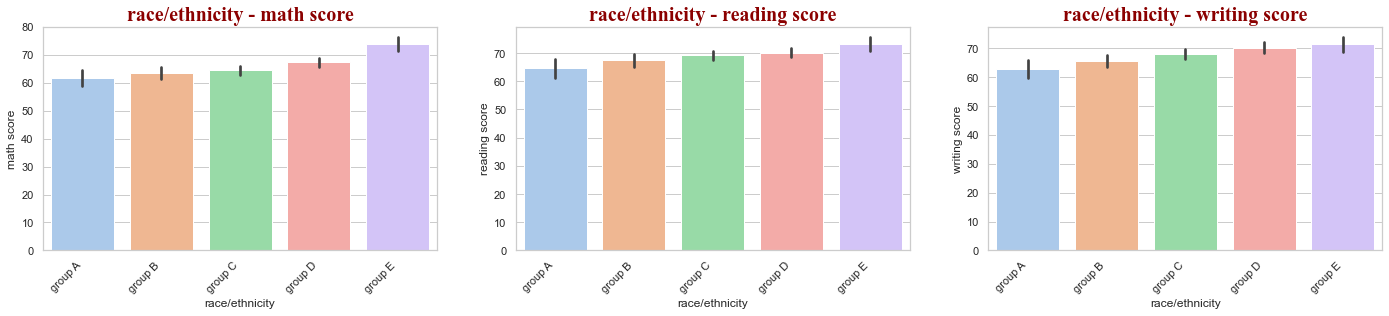

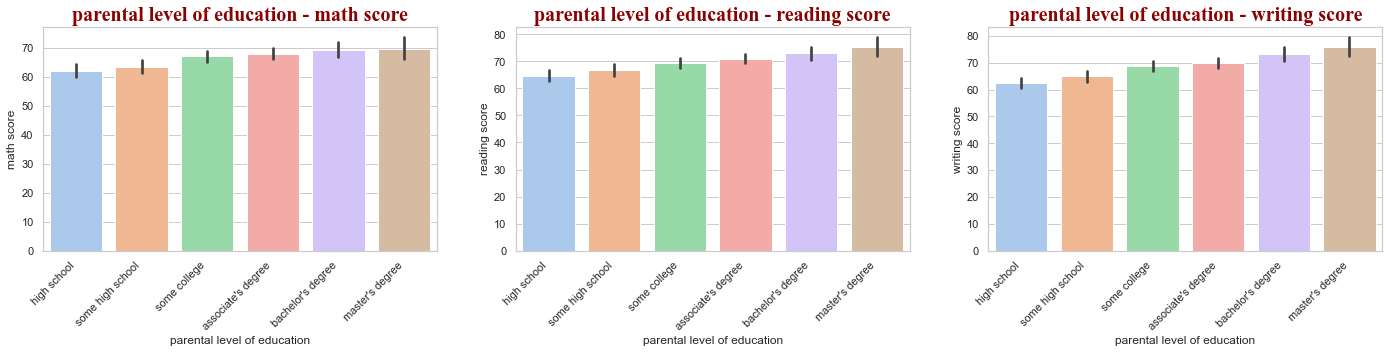

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
#plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8,5.5)
# to display more (100) columns in pandas display() method
pd.set_option('display.max_columns', 100)
# custom font defs
title_font = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 20}
axis_font  = {'family': 'times new roman', 'color': 'darkred','weight': 'bold','size': 20 }

df = pd.read_csv('StudentsPerformance.csv')

display(df.head())

display(df.groupby('gender').mean())
display(df.groupby('race/ethnicity').mean())
display(df.groupby('parental level of education').mean())


i = 1
columns = ['math score', 'reading score', 'writing score']
categories = ['gender', 'race/ethnicity', 'parental level of education'] 
for category in categories :
    plt.figure(figsize=(24,14))
    for column in columns :
        result = df.groupby([category])[column].aggregate(np.mean).reset_index().sort_values(column)
        plt.subplot(3,3,i)
        sns.barplot(df[category], df[column], order = result[category], palette= 'pastel')
        plt.title(category + ' - ' + column, fontdict = title_font)
        plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
        
        i += 1
    
plt.show()


---
***T Testi ile Tespit***

- t-testi, farklılıkların istatistiksel olarak anlamlı olup olmadığını tespit etmemize yarar. 
- t testi sonucunda p degerinin 0.05 ve altinda oldugu durumlarda grup farkliliklarinin belirgin oldugu soylenebilir. 

- Cinsiyetin etkisi - t testi sonucu
    - Erkekler matematikte,
    - Kizlar ise okuma ve yazma notlarinda belirgin sekilde daha iyidir.

In [42]:
# Test whether group differences are significant.
genders = df['gender'].unique()

pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(genders)):
        for j in range(i+1, len(genders)):
            ttest = stats.ttest_ind(df[df["gender"]==genders[i]][var], 
                                df[df["gender"]==genders[j]][var])
            grup_1 = genders[i]
            grup_2 = genders[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,-5.383245869828983,0.000000091201855


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,7.959308005187657,0.000000000000005


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,female,male,9.979557910004507,0.000000000000000


- Kokenin etkisi - t testi sonucu
    - Matematikte:
        - E grubu butun gruplardan 
        - D grubu E haric diger gruplardan belirgin sekilde daha iyidir,
    - Okumada:
        - E grubu butun gruplardan
        - D grubu yalnizca A grubundan
        - C grubu da yalnizca A grubundan belirgin sekilde daha iyidir,
    - Yazmada:
        - E grubu A, B ve C gruplarindan,
        - D grubu A ve B gruplarinden,
        - C grubu A grubundan belirgin sekilde daha iyidir.

In [43]:
# Test whether group differences are significant.
races = df['race/ethnicity'].unique()

pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(races)):
        for j in range(i+1, len(races)):
            ttest = stats.ttest_ind(df[df["race/ethnicity"]==races[i]][var], 
                                df[df["race/ethnicity"]==races[j]][var])
            grup_1 = races[i]
            grup_2 = races[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.731566989353426,0.464770893916745
1,group B,group A,0.935507627974749,0.350341596165996
2,group B,group D,-2.828455397126750,0.004886197137104
3,group B,group E,-6.007397050552227,0.000000005007946
4,group C,group A,1.599722030321730,0.110438107455880
5,group C,group D,-2.418586247460110,0.015888349556016
6,group C,group E,-6.127642520822135,0.000000001927239
7,group A,group D,-3.346698242971230,0.000906863605354
8,group A,group E,-5.936141025544798,0.000000010835591
9,group D,group E,-4.282287214674715,0.000023187640327


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.322315621290177,0.186659280903507
1,group B,group A,1.363368226202768,0.173873551344372
2,group B,group D,-1.945156363686479,0.052378620655970
3,group B,group E,-3.386066945409153,0.000795161849524
4,group C,group A,2.575432218066352,0.010364398025471
5,group C,group D,-0.797010931640892,0.425771382113019
6,group C,group E,-2.713301864537168,0.006913284280499
7,group A,group D,-3.046854857346119,0.002488654464332
8,group A,group E,-4.071106227981414,0.000064633959318
9,group D,group E,-2.010647940603179,0.045033306431346


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.596496343374041,0.111001095981452
1,group B,group A,1.462442057799811,0.144753741989939
2,group B,group D,-3.199293332325260,0.001474997888132
3,group B,group E,-3.383197834524452,0.000803230048635
4,group C,group A,2.848872404992454,0.004610690740740
5,group C,group D,-1.889663151672625,0.059302329187082
6,group C,group E,-2.350281186835918,0.019183539018898
7,group A,group D,-4.155631636144919,0.000040848057340
8,group A,group E,-4.223473663197010,0.000034832780645
9,group D,group E,-0.823973657152092,0.410445551739226


- Ebeveyn egitim durumu etkisi - t testi sonucu
    - Matematikte:
        - Yuksek lisans(masters), lisans(bachelors), yuksekokul(associates) ya da kolej(some college) mezunu ebeveyn cocuklari lise mezunu(high school, some high school) ebeveyn cocuklarindan belirgin derecede daha iyidir,
    - Okumada:
        - Yuksek lisans mezunu ebeveyn cocuklari lisans dereceli ebeveyn cocuklari haric tum diger ebeveyn cocuklarindan,
        - Lisans mezunu ebeveyn cocuklari kolej ve lise mezunu ebeveyn cocuklarindan
        - Yuksekokul mezunu ebeveyn cocuklari lise mezunu ebeveyn cocuklarindan belirgin derecede daha iyidir,
    - Yazmada:
        - Yuksek lisans mezunu ebeveyn cocuklari lisans dereceli ebeveyn cocuklari haric tum diger ebeveyn cocuklarindan,
        - Lisans mezunu ebeveyn cocuklari yuksekokul, kolej ve lise mezunu ebeveyn cocuklarindan
        - Yuksekokul mezunu ebeveyn cocuklari lise mezunu ebeveyn cocuklarindan belirgin derecede daha iyidir.

In [44]:
# Test whether group differences are significant.
parents = df['parental level of education'].unique()

pd.options.display.float_format = '{:.15f}'.format
for var in ["math score", "reading score", "writing score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(parents)):
        for j in range(i+1, len(parents)):
            ttest = stats.ttest_ind(df[df["parental level of education"]==parents[i]][var], 
                                df[df["parental level of education"]==parents[j]][var])
            grup_1 = parents[i]
            grup_2 = parents[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

math score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,1.370235282961748,0.171512242184716
1,bachelor's degree,master's degree,-0.148681965688493,0.881975782486770
2,bachelor's degree,associate's degree,0.878664188979324,0.380207578180362
3,bachelor's degree,high school,4.236143622484822,0.000029965345854
4,bachelor's degree,some high school,3.196718602676573,0.001540919292281
5,some college,master's degree,-1.235633421582457,0.217619568103474
6,some college,associate's degree,-0.542684269624753,0.587618280923407
7,some college,high school,3.546107949568116,0.000434980041925
8,some college,some high school,2.411704623140763,0.016324361572646
9,master's degree,associate's degree,0.841122968856347,0.400999363612466


reading score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.204882120908508,0.028127555314401
1,bachelor's degree,master's degree,-1.054085894947598,0.293296751317879
2,bachelor's degree,associate's degree,1.297796985045283,0.195242064830911
3,bachelor's degree,high school,5.017577900835298,0.000000880425031
4,bachelor's degree,some high school,3.403927067379874,0.000756197171973
5,some college,master's degree,-2.888843374950649,0.004165440800640
6,some college,associate's degree,-1.112318821691490,0.266600285399801
7,some college,high school,3.457842768362033,0.000600104848125
8,some college,some high school,1.714161972758909,0.087267868562439
9,master's degree,associate's degree,2.191201575983869,0.029264145709722


writing score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.680331468463220,0.007711012023673
1,bachelor's degree,master's degree,-0.999874130680484,0.318751964146466
2,bachelor's degree,associate's degree,2.115929663913376,0.035081624517197
3,bachelor's degree,high school,6.547380937127048,0.000000000240763
4,bachelor's degree,some high school,4.667733097498242,0.000004628198527
5,some college,master's degree,-3.168769063239491,0.001698593313596
6,some college,associate's degree,-0.761596864395391,0.446703166030366
7,some college,high school,4.488520877492127,0.000009275017803
8,some college,some high school,2.575721140379242,0.010358529086081
9,master's degree,associate's degree,2.781241549068550,0.005784032705258


### Q2

Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?


---
- Ogle yemeginin sinav performansina belirgin bir etkisi vardir. Standard ogle yemegi imkani olan ogrenciler kisitli yemek imkani olanlardan basarilidir.

,math score,reading score,writing score
lunch,,,
free/reduced,58.921126760563382,64.653521126760566,63.022535211267609
standard,70.034108527131778,71.654263565891469,70.823255813953494


math score                                        \
                           count               mean                std   
lunch                                                                    
free/reduced 355.000000000000000 58.921126760563382 15.159956131640516   
standard     645.000000000000000 70.034108527131778 13.653500996457035   

                                                                       \
                            min                25%                50%   
lunch                                                                   
free/reduced  0.000000000000000 49.000000000000000 60.000000000000000   
standard     19.000000000000000 61.000000000000000 69.000000000000000   

                                                          reading score  \
                            75%                 max               count   
lunch                                                                     
free/reduced 69.000000000000000 100.000000000000000 355.000000000000000   
standard     80.000000000000000 100.000000000000000 645.000000000000000   

                                                                       \
                           mean                std                min   
lunch                                                                   
free/reduced 64.653521126760566 14.895339495848569 17.000000000000000   
standard     71.654263565891469 13.830602308284634 26.000000000000000   

                                                                       \
                            25%                50%                75%   
lunch                                                                   
free/reduced 56.000000000000000 65.000000000000000 75.000000000000000   
standard     63.000000000000000 72.000000000000000 82.000000000000000   

                                       writing score                     \
                             max               count               mean   
lunch                                                                     
free/reduced 100.000000000000000 355.000000000000000 63.022535211267609   
standard     100.000000000000000 645.000000000000000 70.823255813953494   

                                                                       \
                            std                min                25%   
lunch                                                                   
free/reduced 15.433822616584569 10.000000000000000 53.000000000000000   
standard     14.339486981713934 22.000000000000000 62.000000000000000   

                                                                        
                            50%                75%                 max  
lunch                                                                   
free/reduced 64.000000000000000 74.000000000000000 100.000000000000000  
standard     72.000000000000000 81.000000000000000 100.000000000000000

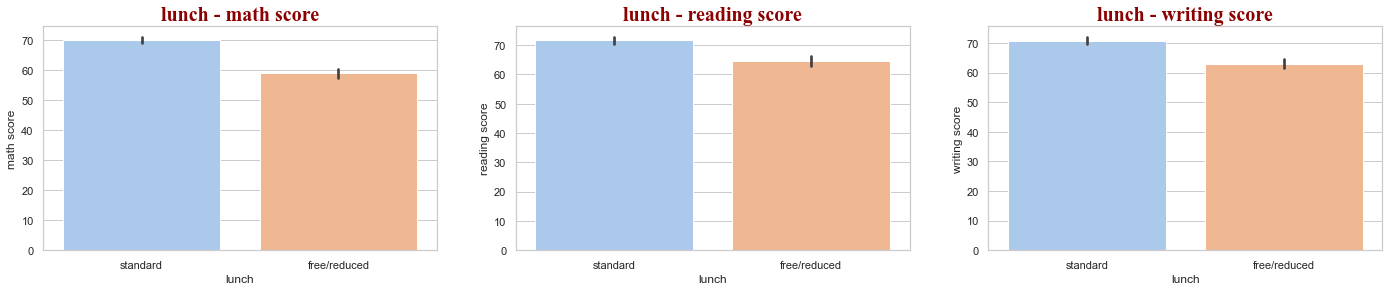

In [45]:
display(df.groupby('lunch').mean())

display(df.groupby('lunch').describe())

category = 'lunch'
columns = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(24,14))
i=1
for column in columns :
    
    plt.subplot(3,3,i)
    sns.barplot(df[category], df[column], palette = 'pastel')
    plt.title(category + ' - ' + column, fontdict = title_font)     
    i += 1
    
plt.show()

### Q3

Hazırlık kurslarının sinav performansı üzerinde bir etkisi var mı?


---
- Hazırlık kurslarının sinav performansina belirgin bir etkisi vardir. Hazırlık kursuna katilan ogrenciler daha basarilidir.

,math score,reading score,writing score
test preparation course,,,
completed,69.695530726256990,73.893854748603346,74.418994413407816
none,64.077881619937699,66.534267912772592,64.504672897196258


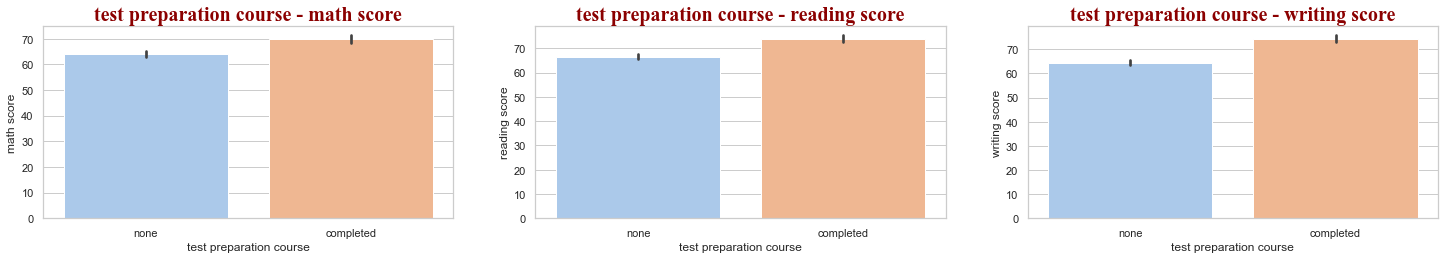

In [46]:
display(df.groupby('test preparation course').mean())

category = 'test preparation course'
columns = ['math score', 'reading score', 'writing score']
plt.figure(figsize=(25,12))
i=1
for column in columns :
    
    plt.subplot(3,3,i)
    sns.barplot(df[category], df[column], palette = 'pastel')
    plt.title(category + ' - ' + column, fontdict = title_font)     
    i += 1
    
plt.show()

### Q4

Birbiriyle korelasyonu en fazla olan dersler hangisidir?

---
- En fazla korelasyon okuma(reading) ve yazma (writing) dersleri arasindadir.

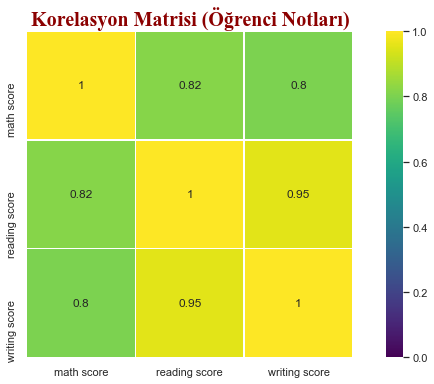

In [47]:
corr_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)", fontdict=title_font)

plt.show()